In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

/tmp/ipykernel_12576/1566524480.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [47]:
folder='data_original/MRI'
files = os.listdir(folder)
#read files
features=0
for file in files:
    if file.endswith('.csv'):
        print(file)
        df = pd.read_csv(folder+'/'+file, sep=',')
        #print(df.head())
        #print(df.columns)
        print(df.shape)
        features+=df.shape[1]
print('Total features:',features)   

WM.csv
(4603, 426)
ASEG.csv
(4603, 291)
RHDKT.csv
(4603, 103)
LHA2009.csv
(4603, 232)
LHDKT.csv
(4603, 103)
RHA2009.csv
(4603, 232)
Subjects.csv
(4603, 1)
BRAIN.csv
(4603, 17)
RHAPARC.csv
(4603, 112)
LHAPARC.csv
(4603, 112)
Total features: 1629


In [3]:
folder='data/original'
files = os.listdir(folder)
#read files
features=0
for file in files:
    if file.endswith('.csv'):
        print(file)
        df = pd.read_csv(folder+'/'+file, sep='\t')
        #print(df.head())
        #print(df.columns)
        print(df.shape)
        features+=df.shape[1]
print('Total features:',features)   

WM.csv
(4603, 426)
ASEG.csv
(4603, 278)
RHDKT.csv
(4603, 103)
LHA2009.csv
(4603, 223)
LHDKT.csv
(4603, 96)
RHA2009.csv
(4603, 223)
Subjects.csv
(4603, 8)
BRAIN.csv
(4603, 8)
RHAPARC.csv
(4603, 103)
LHAPARC.csv
(4603, 103)
Total features: 1571


In [4]:
filename='data/negative_norm_confirmed/all_concatenated.csv'
df = pd.read_csv(filename, sep='\t')
print(df.shape)

(2276, 1562)


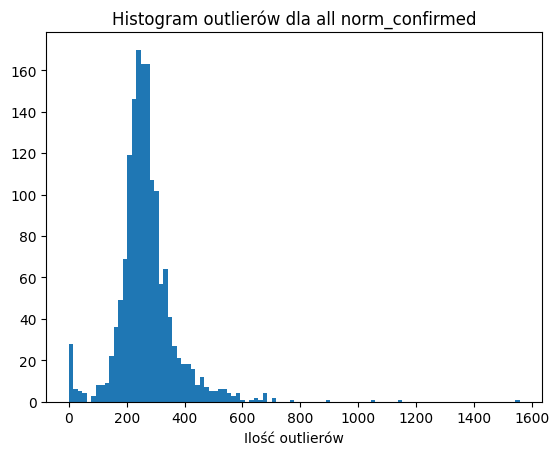

In [7]:
type='all'
filename=f'results/{type}_outliers_values.csv'
df = pd.read_csv(filename, sep='\t', index_col=0)

#make a histogram from row 'outliers_values'

plt.hist(df.loc['outliers_number'], bins=100)
plt.title(f'Histogram outlierów dla {type} norm_confirmed')
plt.xlabel('Ilość outlierów')
plt.savefig(f'plots/outliers_{type}.png')

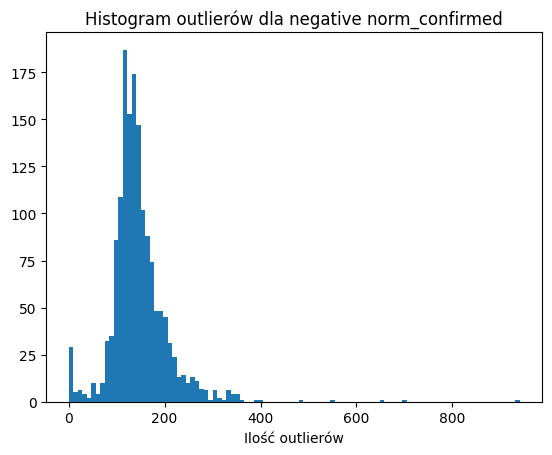

In [54]:
type='negative'
filename=f'results/{type}_outliers_values.csv'
df = pd.read_csv(filename, sep='\t', index_col=0)

#make a histogram from row 'outliers_values'

plt.hist(df.loc['outliers_number'], bins=100)
plt.title(f'Histogram outlierów dla {type} norm_confirmed')
plt.xlabel('Ilość outlierów')
plt.savefig(f'plots/outliers_{type}.png')

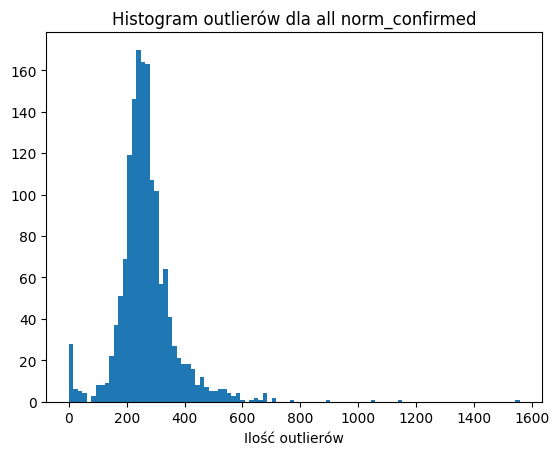

In [55]:
type='all'
filename=f'results/{type}_outliers_values.csv'
df = pd.read_csv(filename, sep='\t', index_col=0)

#make a histogram from row 'outliers_values'

plt.hist(df.loc['outliers_number'], bins=100)
plt.title(f'Histogram outlierów dla {type} norm_confirmed')
plt.xlabel('Ilość outlierów')
plt.savefig(f'plots/outliers_{type}.png')

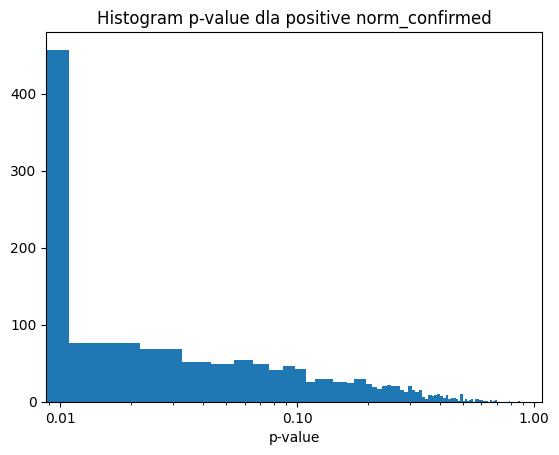

In [8]:
type='positive'
filename=f'results/{type}_outliers_values.csv'
df = pd.read_csv(filename, sep='\t', index_col=0)

#make a histogram from row 'outliers_values'

plt.hist(df.loc['p_after'], bins=80)
plt.title(f'Histogram p-value dla {type} norm_confirmed')
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.xlabel('p-value')
plt.savefig(f'plots/pvalue_{type}_log.png')

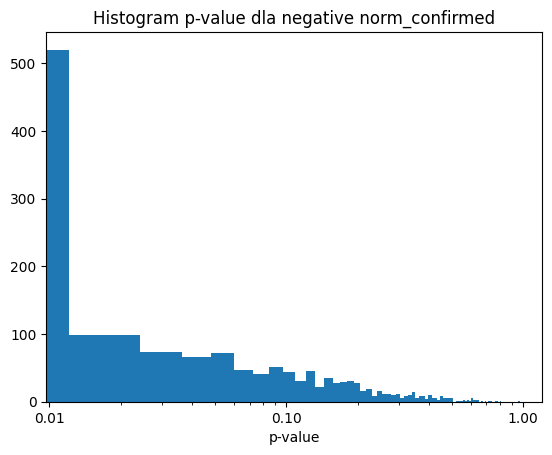

In [9]:
type='negative'
filename=f'results/{type}_outliers_values.csv'
df = pd.read_csv(filename, sep='\t', index_col=0)

#make a histogram from row 'outliers_values'

plt.hist(df.loc['p_after'], bins=80)
plt.title(f'Histogram p-value dla {type} norm_confirmed')
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.xlabel('p-value')
plt.savefig(f'plots/pvalue_{type}_log.png')

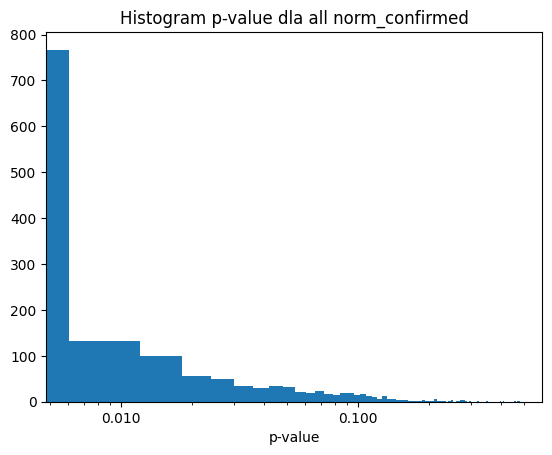

In [10]:
type='all'
filename=f'results/{type}_outliers_values.csv'
df = pd.read_csv(filename, sep='\t', index_col=0)

#make a histogram from row 'outliers_values'

plt.hist(df.loc['p_after'], bins=80)
plt.title(f'Histogram p-value dla {type} norm_confirmed')
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.xlabel('p-value')
plt.savefig(f'plots/pvalue_{type}_log.png')

In [14]:
#del type
import numpy as np

filename=f'results/importance_age_rnn.csv'
nr_of_component=0
nr_of_features=20
df = pd.read_csv(filename, sep='\t', index_col=0)
explained_var_first = [[] for _ in range(nr_of_features)]
#find all cells with LH_Mean_Thickness in first row
names=[]
for cell in df.iloc[nr_of_component][:nr_of_features]:
    names.append(cell)

for j, cell in enumerate(df.iloc[nr_of_component]):
    for i, name in enumerate(names):
        if type(cell)==str:
            if name in cell:
                explained_var_first[i].append(df.iloc[nr_of_component][j + nr_of_features+1])

# Konwertuj listy na tablice numpy
explained_var_first = [np.array(x) for x in explained_var_first]

# Oblicz średnią i odchylenie standardowe dla każdej cechy
for i, values in enumerate(explained_var_first):
    mean_value = np.mean(values) if len(values) > 0 else np.nan
    std_value = np.std(values) if len(values) > 0 else np.nan
    print(f"Feature {names[i]}:")
    print(f"Mean: {mean_value}")
    print(f"Std Dev: {std_value}")

Feature LH_Mean_Thickness:
Mean: 0.06927590449850331
Std Dev: 0.000313661474965176
Feature RH_Mean_Thickness:
Mean: 0.06909126951879421
Std Dev: 0.000323961935049808
Feature APARC-ctx-lh-precuneus_ThickAvg:
Mean: 0.06334238387193222
Std Dev: 0.00015255099661435113
Feature DKT-ctx-lh-precuneus_ThickAvg:
Mean: 0.0630077961070528
Std Dev: 0.0001599425411452891
Feature APARC-ctx-rh-precuneus_ThickAvg:
Mean: 0.06273752124120939
Std Dev: 0.00021191043465445327
Feature DKT-ctx-rh-precuneus_ThickAvg:
Mean: 0.06260282971310002
Std Dev: 0.00024908936353638326
Feature APARC-ctx-rh-supramarginal_ThickAvg:
Mean: 0.06280756386973534
Std Dev: 0.00021899250186896478
Feature DKT-ctx-rh-supramarginal_ThickAvg:
Mean: 0.0625618655344562
Std Dev: 0.00019423043021392705
Feature APARC-ctx-rh-inferiorparietal_ThickAvg:
Mean: 0.06212810079873996
Std Dev: 0.00029203910184663834
Feature DKT-ctx-rh-inferiorparietal_ThickAvg:
Mean: 0.062046015700916855
Std Dev: 0.00028561834104844433
Feature A2009-ctx-rh-S_tempora

/tmp/ipykernel_12576/1661142296.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  explained_var_first[i].append(df.iloc[nr_of_component][j + nr_of_features+1])


In [9]:
filename=f'results/importance_sex_rnn.csv'
nr_of_component=2
nr_of_features=20
df = pd.read_csv(filename, sep='\t', index_col=0)
explained_var_first = [[] for _ in range(nr_of_features)]
#find all cells with LH_Mean_Thickness in first row
names=[]
for cell in df.iloc[nr_of_component][:nr_of_features]:
    names.append(cell)

for j, cell in enumerate(df.iloc[nr_of_component]):
    for i, name in enumerate(names):
        if type(cell)==str:
            if name in cell:
                explained_var_first[i].append(df.iloc[nr_of_component][j + nr_of_features+1])

# Konwertuj listy na tablice numpy
explained_var_first = [np.array(x) for x in explained_var_first]

# Oblicz średnią i odchylenie standardowe dla każdej cechy
for i, values in enumerate(explained_var_first):
    mean_value = np.mean(values) if len(values) > 0 else np.nan
    std_value = np.std(values) if len(values) > 0 else np.nan
    print(f"Feature {names[i]}:")
    print(f"Mean: {mean_value}")
    print(f"Std Dev: {std_value}")

Feature ASEG-wm-lh-supramarginal_normStdDev:
Mean: -0.11263594625320299
Std Dev: 0.0004900808319345486
Feature ASEG-wm-rh-middletemporal_normStdDev:
Mean: -0.1103994289588639
Std Dev: 0.0006927050649780513
Feature ASEG-wm-lh-middletemporal_normStdDev:
Mean: -0.11040237363076692
Std Dev: 0.0003677975777560963
Feature ASEG-wm-rh-supramarginal_normStdDev:
Mean: -0.10926126490093527
Std Dev: 0.0005752716092766759
Feature ASEG-wm-lh-inferiorparietal_normStdDev:
Mean: -0.1086718405059035
Std Dev: 0.00021795756379115936
Feature ASEG-wm-rh-inferiorparietal_normStdDev:
Mean: -0.10766109753255222
Std Dev: 0.0005297162059394558
Feature ASEG-wm-lh-inferiortemporal_normStdDev:
Mean: -0.10678585263180711
Std Dev: 0.000354442079724427
Feature ASEG-wm-rh-inferiortemporal_normStdDev:
Mean: -0.1032509842395067
Std Dev: 0.0004430214699749877
Feature ASEG-Right-Hippocampus_normMean:
Mean: 0.10156870148200789
Std Dev: 0.0008229970592957049
Feature ASEG-wm-rh-parstriangularis_normStdDev:
Mean: -0.1020132709

/tmp/ipykernel_12576/45844752.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  explained_var_first[i].append(df.iloc[nr_of_component][j + nr_of_features+1])


In [44]:
filename=f'results/importance_age_rnn.csv'
nr_of_component=1
nr_of_features=5
df = pd.read_csv(filename, sep='\t', index_col=0)
explained_var_first = [[] for _ in range(nr_of_features)]
#find all cells with LH_Mean_Thickness in first row
names=[]
for cell in df.iloc[nr_of_component][:nr_of_features]:
    names.append(cell)

for j, cell in enumerate(df.iloc[nr_of_component]):
    for i, name in enumerate(names):
        if type(cell)==str:
            if name in cell:
                explained_var_first[i].append(df.iloc[nr_of_component][j + nr_of_features+1])

# Konwertuj listy na tablice numpy
explained_var_first = [np.array(x) for x in explained_var_first]

# Oblicz średnią i odchylenie standardowe dla każdej cechy
for i, values in enumerate(explained_var_first):
    mean_value = np.mean(values) if len(values) > 0 else np.nan
    std_value = np.std(values) if len(values) > 0 else np.nan
    print(f"Feature {names[i]}:")
    print(f"Mean: {mean_value}")
    print(f"Std Dev: {std_value}")

Feature ASEG-wm-lh-precuneus_normStdDev:
Mean: 0.09230469107530845
Std Dev: 0.002765760899590419
Feature ASEG-Left-Hippocampus_normMean:
Mean: -0.09187702007040982
Std Dev: 0.003302229434560223
Feature ASEG-Right-Hippocampus_normMean:
Mean: -0.09251064685069048
Std Dev: 0.0017776164537318634
Feature ASEG-wm-rh-fusiform_normStdDev:
Mean: 0.09128865243627896
Std Dev: 0.002940734566447276
Feature ASEG-wm-lh-fusiform_normStdDev:
Mean: 0.09115950920908288
Std Dev: 0.0023857192217039583


/tmp/ipykernel_82018/3947134011.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  explained_var_first[i].append(df.iloc[nr_of_component][j + nr_of_features+1])


In [45]:
filename=f'results/importance_age_rnn.csv'
nr_of_component=0
expl_var=[]
df = pd.read_csv(filename, sep='\t', index_col=0)
for column in df.columns:
    if 'Explained Variability' in column:
        expl_var.append(df[column].iloc[0])

print(expl_var)
print(np.mean(expl_var), np.std(expl_var))


[0.2130496235, 0.2082877726, 0.2085462397, 0.2044202982, 0.2085744627]
0.20857567934 0.002733756654459925


In [46]:
filename=f'results/importance_age_rnn.csv'
nr_of_component=0
expl_var=[]
df = pd.read_csv(filename, sep='\t', index_col=0)
for column in df.columns:
    if 'Explained Variability' in column:
        expl_var.append(df[column].iloc[1])

print(expl_var)
print(np.mean(expl_var), np.std(expl_var))

[0.0689171294, 0.0676267763, 0.0669859043, 0.0671760045, 0.0673870599]
0.06761857487999999 0.0006835277455550333


In [16]:

from utils import dimensions_reduction, prepare_dataset, plots, train, test
import pandas as pd

/home/marysia/.pyenv/versions/3.9.7/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-09-16 14:31:19.848306: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-16 14:31:20.076493: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-16 14:31:20.076650: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-16 14:31:20.112662: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plu

In [20]:
import importlib
importlib.reload(plots)

<module 'utils.plots' from '/home/marysia/Documents/GitHub/MRI_machine_learning/utils/plots.py'>

Explained variability per principal component: ['0.2014031943', '0.1302003303', '0.0641382149', '0.0286637310', '0.0256273535', '0.0199616175', '0.0184842289', '0.0160692504', '0.0156268252', '0.0126393191', '0.0118325724', '0.0114527515', '0.0100430549', '0.0094284310', '0.0084395201', '0.0082409890', '0.0078413239', '0.0072965466', '0.0068711422', '0.0066240528', '0.0065445252', '0.0061712188', '0.0061204838', '0.0060193792', '0.0055424290', '0.0055348122', '0.0054355778', '0.0052371349', '0.0049941930', '0.0048000261', '0.0046716327', '0.0044624166', '0.0042942567', '0.0042094082', '0.0041297422']
35
(4352, 35) (4352, 35)


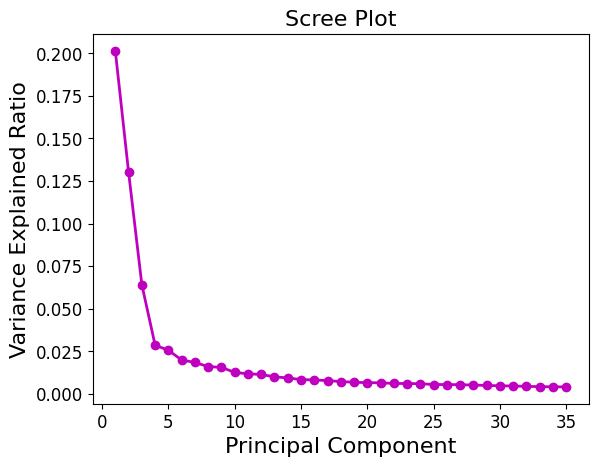

In [19]:
components_nr=35
type='all'
n_most_important_features=5
df=pd.read_csv(f'data/{type}_norm_confirmed_normal/all_concatenated.csv', sep='\t')
df=df.drop(columns=['identifier', 'norm_confirmed', 'sex', 'female', 'male'])
prepare_dataset.divide_by_total_volume(df)

X_train, X_test=prepare_dataset.standarize_data(df, df)
pca_mri, train_pca, test_pca, importance_df=dimensions_reduction.principal_component_analysis(X_train, X_test, components_nr, n_features=n_most_important_features)
explained_variance_ratio=pca_mri.explained_variance_ratio_
formatted_explained_variance = [f"{num:.10f}" for num in explained_variance_ratio]
print('Explained variability per principal component: {}'.format(formatted_explained_variance))
print(len(formatted_explained_variance))
print(train_pca.shape, test_pca.shape)
plots.scree_plot(pca_mri, type=type, dev=False)

In [87]:
import re

# Wczytaj dane z pliku
with open('positive_component1.txt', 'r') as file:
    data = file.read()

# Wzorzec do wyodrębnienia cech
pattern = r'Feature (\S+):\s*Mean: ([\-\d\.e]+)\s*Std Dev: ([\-\d\.e]+)'
matches = re.findall(pattern, data)

# Przygotowanie nagłówka tabeli LaTeX
latex_table = r"""
\begin{table}[H]
\caption{Cechy dla komponentu nr 3}
\begin{tabular}{|c|l|l|}
\hline
Comp\_nr & Atribute name                                    & Mean \& Std Dev                       \\ \hline
"""

# Dodaj dane do tabeli LaTeX
for i, match in enumerate(matches, start=1):
    feature_name, mean, std_dev = match
    feature_name = feature_name.replace('_', '\_')
    latex_table += f"3        & {feature_name} & {mean}±{std_dev} \\\\ \hline\n"

# Dodaj stopkę tabeli
latex_table += r"""
\end{tabular}
\end{table}
"""

# Zapisz do pliku .tex
with open('table.tex', 'w') as file:
    file.write(latex_table)

print("Tabela LaTeX została zapisana do pliku 'table.tex'.")


Tabela LaTeX została zapisana do pliku 'table.tex'.
